In [3]:
import pandas as pd
import numpy as np
from pathlib import Path
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime as dt

In [2]:
p1 = Path.cwd() / 'back_data'

In [5]:
pd.to_datetime(pd.Series([10, 100, 1000, 10000]), unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [6]:
pd.to_datetime(pd.Series(['12-5-2015', '14-1-2013', '20/12/2017', '40/23/2017']), dayfirst=True, errors='coerce')

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [7]:
td1 = pd.to_timedelta([10, 100], unit='s')
td2 = pd.to_timedelta(['3 hours', '4 hours'])
td1 + td2

TimedeltaIndex(['0 days 03:00:10', '0 days 04:01:40'], dtype='timedelta64[ns]', freq=None)

In [8]:
pd.to_timedelta('12 days') / pd.to_timedelta('3 days')

4.0

In [10]:
ts = pd.to_datetime('2016-10-1 04:23:23')
ts.ceil('h'), ts.round('h'), ts.floor('h')

(Timestamp('2016-10-01 05:00:00'),
 Timestamp('2016-10-01 04:00:00'),
 Timestamp('2016-10-01 04:00:00'))

In [11]:
crime = pd.read_hdf(p1 / 'crime.h5', 'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [12]:
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [13]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [14]:
crime.loc['2016-05', :]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-02 01:11:00,public-order-crimes-other,all-other-crimes,-104.959488,39.771389,clayton,1,0
2016-05-02 17:30:00,traffic-accident-hit-and-run,traffic-accident,-104.985704,39.781041,globeville,0,1
2016-05-02 15:15:00,theft-of-motor-vehicle,auto-theft,-104.957429,39.779528,elyria-swansea,1,0
2016-05-01 04:50:00,traffic-accident-hit-and-run,traffic-accident,-105.035241,39.699792,westwood,0,1
2016-05-01 10:02:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.944782,39.729557,congress-park,1,0
...,...,...,...,...,...,...,...
2016-05-27 10:17:00,assault-simple,other-crimes-against-persons,-104.892916,39.659553,hampden,1,0
2016-05-14 19:07:00,burglary-residence-by-force,burglary,-104.884967,39.741850,east-colfax,1,0
2016-05-01 21:47:00,menacing-felony-w-weap,aggravated-assault,-105.025088,39.707590,westwood,1,0


In [16]:
crime.loc['2015-11':'2015-12', :].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-11-01 00:00:00,criminal-trespassing,all-other-crimes,-104.997323,39.710777,baker,1,0
2015-11-01 00:07:00,traffic-accident-dui-duid,traffic-accident,-104.978159,39.724022,speer,0,1
2015-11-01 00:07:00,disturbing-the-peace,public-disorder,-105.047392,39.759143,west-highland,1,0
2015-11-01 00:10:00,traf-other,all-other-crimes,-105.043202,39.708930,westwood,1,0
2015-11-01 00:15:00,theft-shoplift,larceny,-105.024785,39.788961,chaffee-park,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:35:00,drug-cocaine-possess,drug-alcohol,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,traffic-accident,traffic-accident,-104.945076,39.736768,congress-park,0,1
2015-12-31 23:44:00,drug-cocaine-possess,drug-alcohol,-104.966814,39.746460,city-park-west,1,0


In [17]:
%%timeit
crime.loc['2015-11':'2015-12', :].sort_index()

6.35 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%%timeit
crime.sort_index().loc['2015-11':'2015-12', :]

61.6 ms ± 224 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
crime = pd.read_hdf(p1 / 'crime.h5', key='crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [23]:
crime.loc[crime['REPORTED_DATE'] == '2016-05-12 16:45:00', :]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
300905,traffic-accident,traffic-accident,2016-05-12 16:45:00,-104.847024,39.779596,montbello,0,1
302354,traffic-accident,traffic-accident,2016-05-12 16:45:00,-105.049180,39.769296,west-highland,0,1
302373,fraud-identity-theft,white-collar-crime,2016-05-12 16:45:00,-104.931971,39.717359,hilltop,1,0


In [25]:
# inclusive의 default는 'both' → 2016-05-13 00:00:00에 닫힘
crime.loc[crime['REPORTED_DATE'].between('2016-05-12', '2016-05-13', inclusive='left'), :]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
295715,criminal-mischief-other,public-disorder,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0
296474,liquor-possession,drug-alcohol,2016-05-12 18:40:00,-104.995692,39.747875,cbd,1,0
297204,traffic-accident,traffic-accident,2016-05-12 22:26:00,-104.880037,39.777037,stapleton,0,1
299383,theft-bicycle,larceny,2016-05-12 20:35:00,-104.929350,39.763797,northeast-park-hill,1,0
299389,theft-of-motor-vehicle,auto-theft,2016-05-12 09:39:00,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...,...
358208,public-peace-other,public-disorder,2016-05-12 17:55:00,-105.027747,39.700029,westwood,1,0
358448,threats-to-injure,public-disorder,2016-05-12 19:24:00,-104.947118,39.763777,clayton,1,0
363134,sex-aslt-rape,sexual-assault,2016-05-12 22:28:00,NaN,NaN,harvey-park-south,1,0
365959,menacing-felony-w-weap,aggravated-assault,2016-05-12 15:59:00,-104.935172,39.723703,hilltop,1,0


In [26]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [27]:
crime.between_time('2:00', '5:00', inclusive='left')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.880586,39.645164,hampden-south,1,0
2017-09-13 04:17:00,theft-of-motor-vehicle,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-simple,other-crimes-against-persons,-104.925733,39.654184,university-hills,1,0


In [28]:
crime.at_time('5:47')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal-mischief-other,public-disorder,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal-mischief-mtr-veh,public-disorder,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal-mischief-other,public-disorder,-104.986767,39.741336,north-capitol-hill,1,0
2017-02-16 05:47:00,aggravated-assault,aggravated-assault,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-interference,all-other-crimes,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-accident,traffic-accident,-104.986311,39.708426,washington-park-west,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.037308,39.768336,west-highland,1,0


In [29]:
crime_sort = crime.sort_index()
crime_sort.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [30]:
crime_sort.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


In [33]:
(crime_sort
 .resample('W')
 .size()
)

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [34]:
# 주의 마지막 날을 목요일로
(crime_sort
 .resample('W-THU')
 .size()
)

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

In [42]:
weekly_crime = (crime_sort
 .groupby(pd.Grouper(freq='W'))
 .size()
)
weekly_crime

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [39]:
crime2 = pd.read_hdf(p1 / 'crime.h5', key='crime')
crime2.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [40]:
(crime2
 .resample('W', on='REPORTED_DATE')
 .size()
)

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [41]:
(crime2
 .groupby(pd.Grouper(freq='W', key='REPORTED_DATE'))
 .size()
)

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

<AxesSubplot:title={'center':'All Denver Crimes'}, xlabel='REPORTED_DATE'>

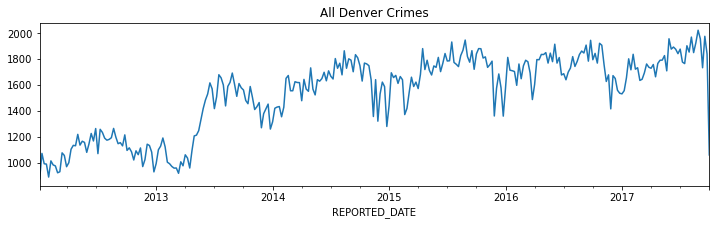

In [44]:
fig, ax = plt.subplots(figsize=(12, 3))
weekly_crime.plot(title='All Denver Crimes', ax=ax)

In [47]:
(crime_sort
 .resample('QS')[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .head()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [49]:
(crime_sort
 .loc['2012-04-01':'2012-06-30', ['IS_CRIME', 'IS_TRAFFIC']]
 .sum(axis=0)
)

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [51]:
(crime_sort
 .groupby(pd.Grouper(freq='QS'))[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .head()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


<AxesSubplot:title={'center':'All Denver Crimes'}, xlabel='REPORTED_DATE'>

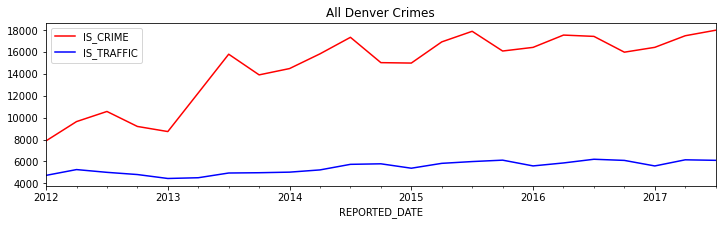

In [53]:
fig, ax = plt.subplots(figsize=(12, 3))
(crime_sort
 .groupby(pd.Grouper(freq='QS'))[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .plot(title='All Denver Crimes', color=['red', 'blue'], ax=ax)
)

In [64]:
(crime_sort
 .groupby(pd.Grouper(freq='QS'))[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .assign(CRIME_PCT=lambda df: df['IS_CRIME'].div(df['IS_CRIME'].shift(1)).sub(1).mul(100).round(2).fillna(0),
         TRAFFIC_PCT=lambda df: df['IS_TRAFFIC'].div(df['IS_TRAFFIC'].shift(1)).sub(1).mul(100).round(2).fillna(0))
)

,IS_CRIME,IS_TRAFFIC,CRIME_PCT,TRAFFIC_PCT
REPORTED_DATE,,,,
2012-01-01,7882,4726,0.00,0.00
2012-04-01,9641,5255,22.32,11.19
2012-07-01,10566,5003,9.59,-4.80
2012-10-01,9197,4802,-12.96,-4.02
2013-01-01,8730,4442,-5.08,-7.50
2013-04-01,12259,4510,40.42,1.53
2013-07-01,15799,4942,28.88,9.58
2013-10-01,13910,4968,-11.96,0.53
2014-01-01,14487,5021,4.15,1.07


In [65]:
crime = pd.read_hdf(p1 / 'crime.h5', key='crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [68]:
(crime.loc[:, 'REPORTED_DATE']
 .dt.day_name()
 .value_counts()
)

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

<AxesSubplot:>

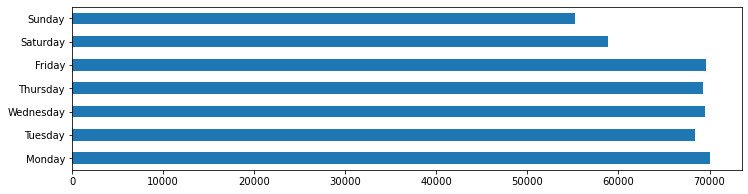

In [76]:
fig, ax = plt.subplots(figsize=(12, 3))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
(crime
 .loc[:, 'REPORTED_DATE']
 .dt.day_name()
 .value_counts()
 .reindex(days, axis=0)
 #.loc[::-1, :]
 .plot.barh(ax=ax)
)

In [78]:
(crime
 .loc[:, 'REPORTED_DATE']
 .dt.day_name()
 .value_counts()
 .reindex(days, axis=0)
 .iloc[::-1]
)

Sunday       55213
Saturday     58834
Friday       69621
Thursday     69287
Wednesday    69538
Tuesday      68394
Monday       70024
Name: REPORTED_DATE, dtype: int64

<AxesSubplot:>

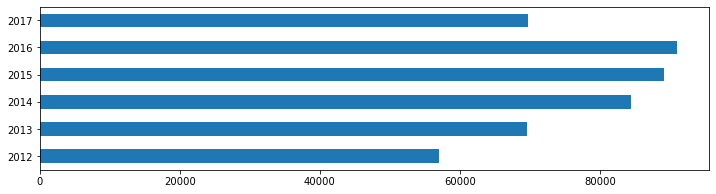

In [79]:
fig, ax = plt.subplots(figsize=(12, 3))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
(crime
 .loc[:, 'REPORTED_DATE']
 .dt.year
 .value_counts()
 .sort_index()
 .plot.barh(ax=ax)
)

In [85]:
(crime
 .groupby([crime.loc[:, 'REPORTED_DATE'].dt.year.rename('YEAR'), crime.loc[:, 'REPORTED_DATE'].dt.day_name().rename('DAY')])
 .size()
 .unstack()
 .reindex(days, axis=1)
)

DAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
YEAR,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,10638,10628,10576,10545,10677,8514,8124


In [89]:
criteria = crime.loc[:, 'REPORTED_DATE'].dt.year.eq(2017)
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

In [102]:
(crime
 .loc[:, 'REPORTED_DATE']
 .dt.dayofyear
 .le(272)
 .groupby(crime.loc[:, 'REPORTED_DATE'].dt.year)
 .mean()
 .mul(100)
 .drop(2017)
 .median()
)

74.83913950593475

In [103]:
def update_2017(df):
    df.loc[2017, :] = df.loc[2017, :].div(0.748).astype('int')
    return df

In [105]:
table = (crime
 .groupby([crime.loc[:, 'REPORTED_DATE'].dt.year.rename('YEAR'), crime.loc[:, 'REPORTED_DATE'].dt.day_name().rename('DAY')])
 .size()
 .unstack()
 .reindex(days, axis=1)
 .pipe(update_2017)
)
table

DAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
YEAR,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


<AxesSubplot:xlabel='DAY', ylabel='YEAR'>

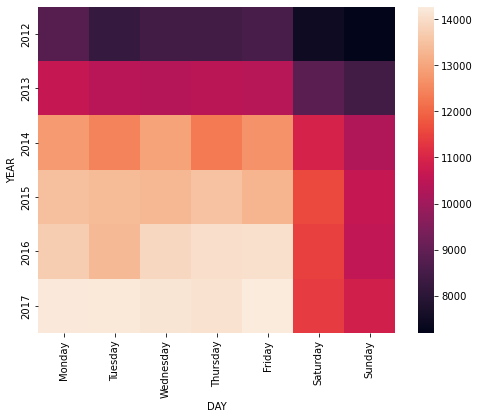

In [106]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(table, ax=ax)

In [107]:
denver_pop = pd.read_csv(p1 / 'denver_pop.csv', index_col='Year')
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [114]:
table = (crime
 .groupby([crime.loc[:, 'REPORTED_DATE'].dt.year.rename('YEAR'), crime.loc[:, 'REPORTED_DATE'].dt.day_name().rename('DAY')])
 .size()
 .unstack()
 .reindex(days, axis=1)
 .pipe(update_2017)
 .div(denver_pop.squeeze(), axis=0)
 .mul(100000)
 .astype('int')
)
table

DAY,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


<AxesSubplot:xlabel='DAY'>

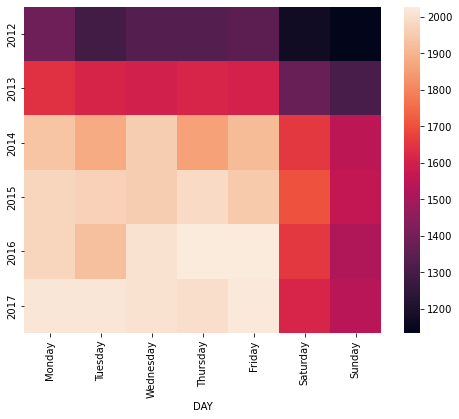

In [115]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(table, ax=ax)

In [119]:
(crime
 .assign(year=crime.loc[:, 'REPORTED_DATE'].dt.year,
         day=crime.loc[:, 'REPORTED_DATE'].dt.day_name())
# loc를 사용하면 안되고 dot 방식이어야.. 왜지?
.pipe(lambda df: pd.crosstab(df.year, df.day))
)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [121]:
crime_sort.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0


In [123]:
(crime_sort
 .groupby(lambda idx: idx.day_name())[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
 .reindex(days, axis=0)
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
Monday,52158,17895
Tuesday,49658,18755
Wednesday,50054,19508
Thursday,49470,19845
Friday,48833,20814
Saturday,43363,15516
Sunday,42315,12968


In [129]:
# idx가 DatetimeIndex라는 걸 어떻게 알지..? 뒤에 메서드 때문에?
funcs = [lambda idx: idx.floor('12h').hour, lambda idx: idx.year]
(crime_sort
 .groupby(funcs)[['IS_CRIME', 'IS_TRAFFIC']]
 .sum()
)

IS_CRIME  IS_TRAFFIC
REPORTED_DATE REPORTED_DATE                      
0             2012              15071        6883
              2013              19804        6650
              2014              24116        7551
              2015              25571        8021
              2016              25967        8073
              2017              19585        6214
12            2012              22215       12903
              2013              30894       12212
              2014              38574       14212
              2015              40323       15289
              2016              41414       15671
              2017              32317       11622

In [130]:
emp = pd.read_csv(p1 / 'employee.csv', parse_dates=['JOB_DATE', 'HIRE_DATE'], index_col='HIRE_DATE')
emp.head()

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,BASE_SALARY,RACE,EMPLOYMENT_TYPE,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,,,
2006-06-12,0,ASSISTANT DIRECTOR (EX LVL),Municipal Courts Department,121862.0,Hispanic/Latino,Full Time,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ASSISTANT,Library,26125.0,Hispanic/Latino,Full Time,Female,Active,2010-09-18
2015-02-03,2,POLICE OFFICER,Houston Police Department-HPD,45279.0,White,Full Time,Male,Active,2015-02-03
1982-02-08,3,ENGINEER/OPERATOR,Houston Fire Department (HFD),63166.0,White,Full Time,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General Services Department,56347.0,White,Full Time,Male,Active,1994-10-22


In [133]:
(emp
 .groupby(['GENDER', pd.Grouper(freq='10AS')])['BASE_SALARY']
 .mean()
 .round(-2)
 .unstack('GENDER')
)

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


In [135]:
cuts = pd.cut(emp.index.year, bins=[-np.inf, 1959, 1969, 1979, 1989, 1999, 2009, np.inf],
              labels=['Before 60', '60s', '70s', '80s', '90s', '00s', 'after 10'])
(emp
 .groupby(['GENDER', cuts])['BASE_SALARY']
 .mean()
 .round(-2)
 .unstack('GENDER')
)

GENDER,Female,Male
Before 60,NaN,81200.0
60s,NaN,89600.0
70s,37500.0,78300.0
80s,56500.0,71000.0
90s,57600.0,64300.0
00s,53000.0,57800.0
after 10,46300.0,45600.0


In [145]:
(emp
 # non-monotonic의 경우 향후 버전에서 지원 불가이므로 sort_index() 필요
 .sort_index()
 .query("GENDER == 'Male'")
 .loc['1970':'1979', 'BASE_SALARY']
 .mean()
)

78298.46153846153

In [144]:
emp.index, crime_sort.index

(DatetimeIndex(['2006-06-12', '2000-07-19', '2015-02-03', '1982-02-08',
                '1989-06-19', '1984-11-26', '2012-03-26', '2013-11-04',
                '1993-11-15', '2016-03-14',
                ...
                '1995-10-14', '2005-09-12', '2011-12-12', '1982-05-03',
                '1983-02-07', '2014-06-09', '2003-09-02', '2014-10-13',
                '2009-01-20', '2009-01-12'],
               dtype='datetime64[ns]', name='HIRE_DATE', length=2000, freq=None),
 DatetimeIndex(['2012-01-02 00:06:00', '2012-01-02 00:06:00',
                '2012-01-02 00:16:00', '2012-01-02 00:47:00',
                '2012-01-02 01:35:00', '2012-01-02 02:39:00',
                '2012-01-02 03:30:00', '2012-01-02 04:07:00',
                '2012-01-02 04:46:00', '2012-01-02 06:52:00',
                ...
                '2017-09-29 03:05:00', '2017-09-29 03:20:00',
                '2017-09-29 03:23:00', '2017-09-29 03:47:00',
                '2017-09-29 03:54:00', '2017-09-29 03:58:00',
     